In [ ]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the dataset

df=pd.read_csv('car data.csv')

In [3]:
# Displaying the head of the dataset

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#Analysing the shape of the dataset

df.shape

(301, 9)

The dataset has 301 rows and 9 columns. 
By observation from the head of the dataset, it is clear that 'Fuel_Type', 'Seller_Type', 'Transmission' and 'Owner' are categorical features.

In [5]:
#Observing details of the dataset

df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
#Extracting the unique categories in these features

print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [7]:
#Checking null values in the dataset

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

There are no null values as count of null is zero.

The feature 'Car_Name' does not play a significant role in prediction of the selling price of the car and hence it can be removed.



In [8]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

The feature 'Year' can be used to derive a new feature 'no_years' that gives the number of years that the car has been used.

In [9]:
#Adding a new feature 'Current_Year'

final_dataset['Current_Year']=2020

In [10]:
#Creating the derived feature 'no_years' by subtracting 'Year' from 'Current_Year'

final_dataset['no_years']=final_dataset['Current_Year']-final_dataset['Year']

In [11]:
#Removing the 'Year' and 'Current_Year' columns

final_dataset.drop(['Year'], axis=1, inplace=True)
final_dataset.drop(['Current_Year'], axis=1, inplace=True)

In [12]:
#Converting categorical features into one-hot encoded

final_dataset=pd.get_dummies(final_dataset, drop_first=True)

In [13]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [14]:
#Checking correlation between different features

final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


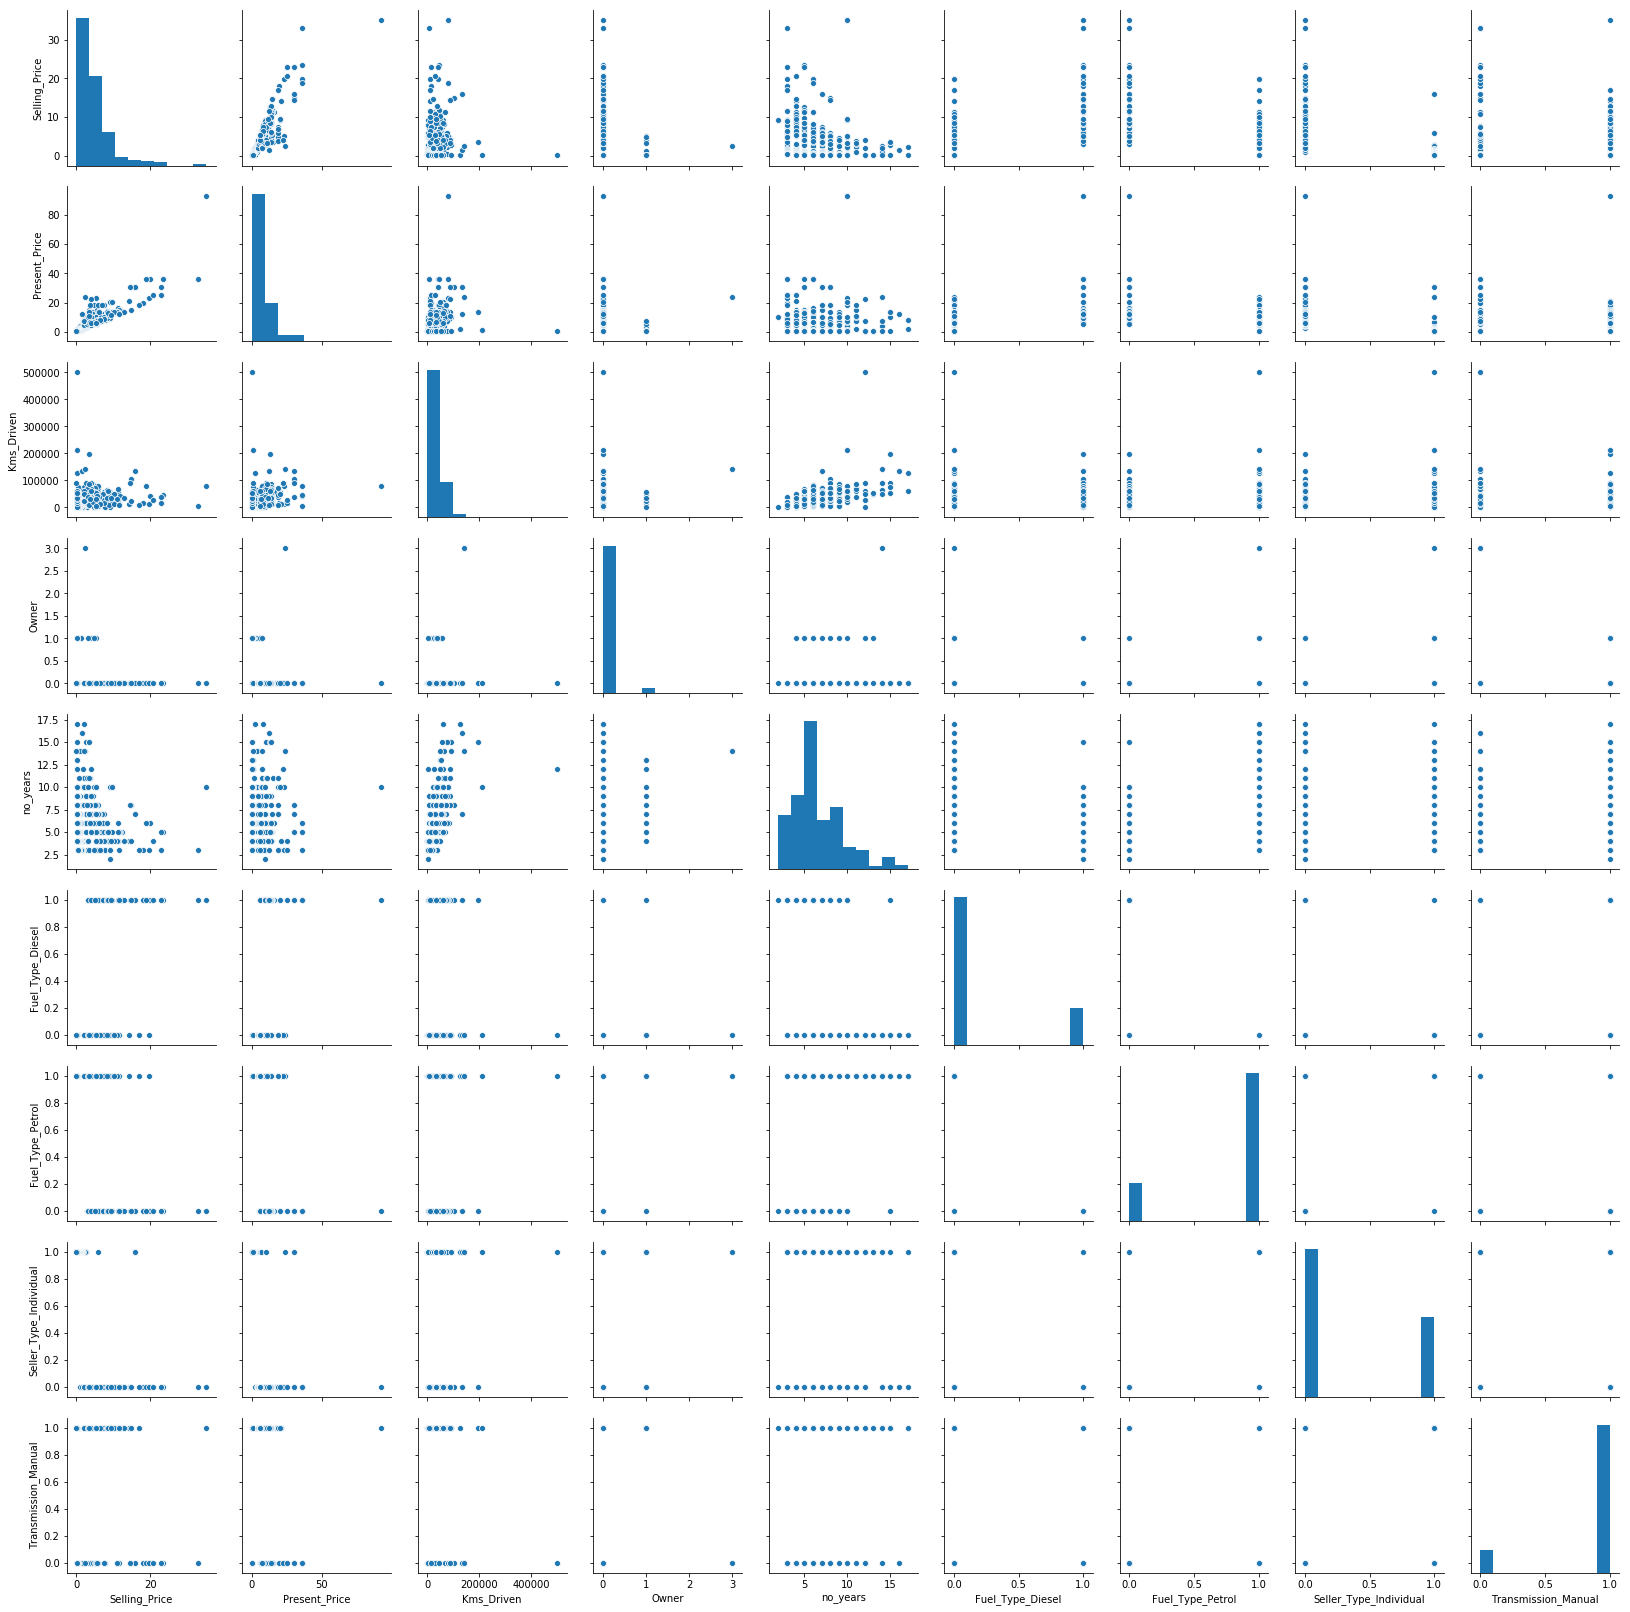

In [15]:
sns.pairplot(final_dataset)


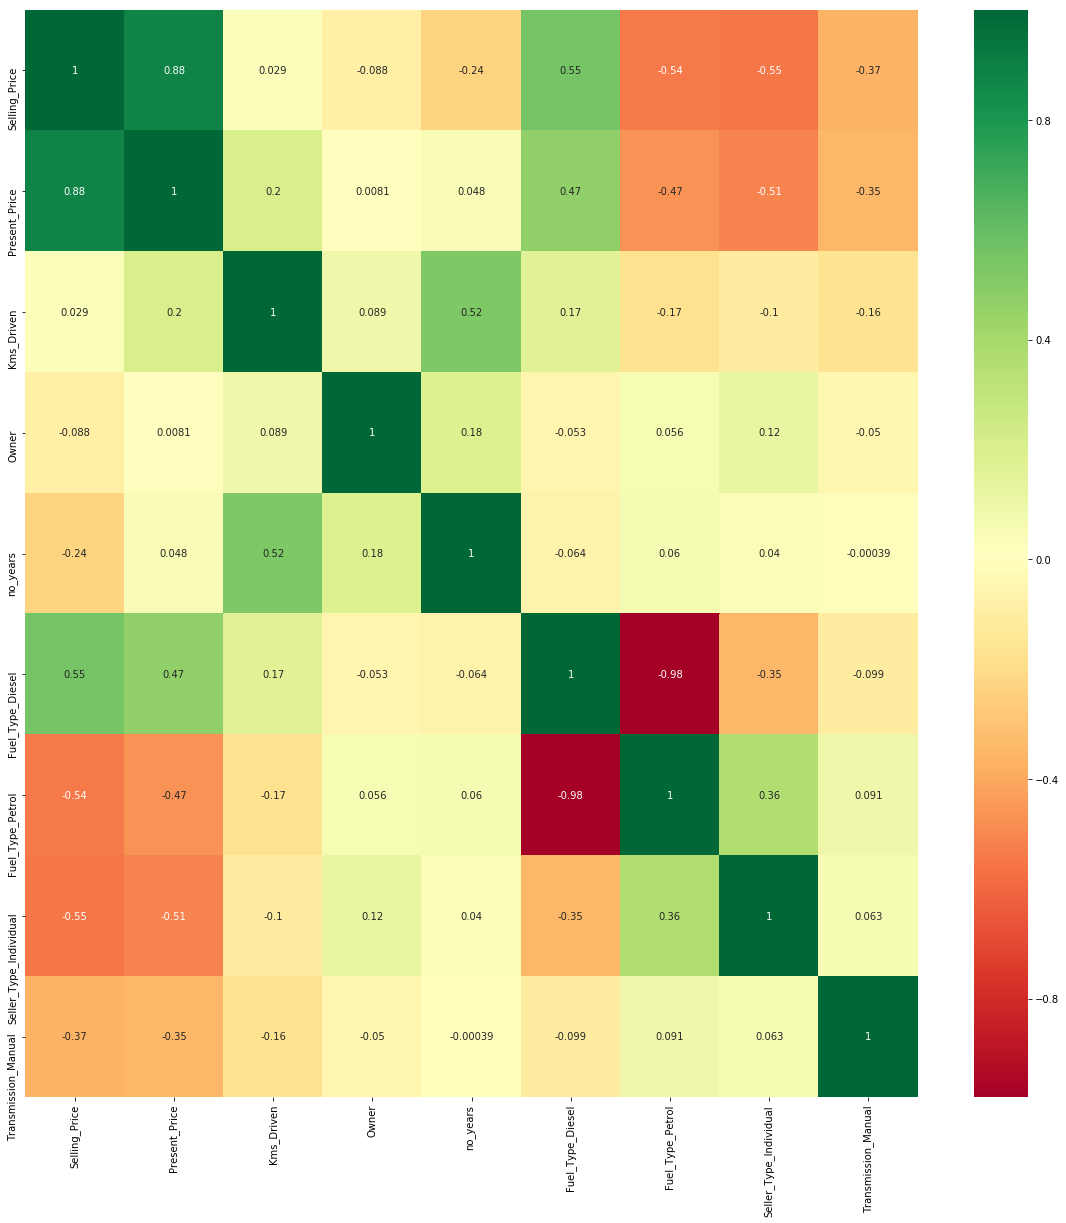

In [16]:
#Visualising the correlation between different features

cmat=final_dataset.corr()
top_corr_features=cmat.index
plt.figure(figsize=(20,20))

#Plotting heat map

map=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')


Selling_Price and Present_Price are highly corelated.

In [17]:
#Dividing the dataset into dependent and independent features

X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [18]:
X.head()

,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [19]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [20]:
# Checking Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[3.41386814e-01 3.35307071e-02 8.85260986e-05 7.28660484e-02
 2.58596889e-01 1.34583980e-02 1.33110533e-01 1.46962085e-01]


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


'Present_Price' is the most important feature.

In [21]:
#Splitting the dataset into train data and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [22]:
#Implementing a Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [23]:
#Randomized Search CV to get the best values of hyperparameters

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [24]:
#Creating and printing the random grid to search for the best hyperparameters 
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [25]:
# Random search of parameters, using 3 fold cross validation, search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.0s
[CV] n_estimators=1100, min_samples_split=10, mi

In [38]:
#Getting the best parameters

rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [39]:
rf_random.best_score_

-3.1879692953508845

In [40]:
#Predicting the values for X_test

predictions=rf_random.predict(X_test)

In [41]:
#Displaying the predictions

predictions

array([ 7.19666925,  6.90000068, 12.86625661,  0.65095785,  7.91000795,
        0.50281752,  7.25505792,  0.23042806,  4.35609554,  4.79935982,
        5.42332322,  4.06411261,  9.76401345,  2.99618937,  2.87616994,
        0.4903505 ,  0.61644148,  4.54561482,  0.60748448,  0.80900811,
        1.12526786, 13.37502045,  5.25368286,  7.16051832,  0.59812387,
        3.19575807,  1.38753989,  4.46894447,  0.91516658,  0.65095785,
        0.42888415, 12.79900561,  5.35171797,  4.90667657,  3.77541442,
        3.5045203 ,  5.27730346,  4.69163423,  5.25979409,  3.69125682,
       22.63125816,  0.3280588 ,  1.13423147,  5.95394181,  5.3355925 ,
        0.40741441,  0.42846451,  2.80716349,  6.19370435,  6.16038708,
        0.36127649,  2.74737851,  4.01897327,  0.48037626,  4.56822075,
        0.41897654,  7.52870086,  0.32053345,  5.47535121,  0.23673118,
        1.16187621])

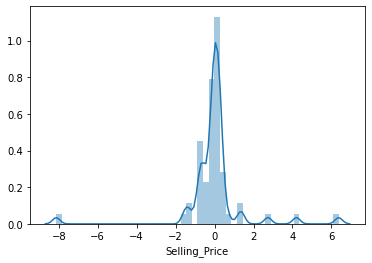

In [42]:
#Creating a distplot for the obtained results

sns.distplot(y_test-predictions)

The model gives good result as the difference is forming a Normal Distribution curve.

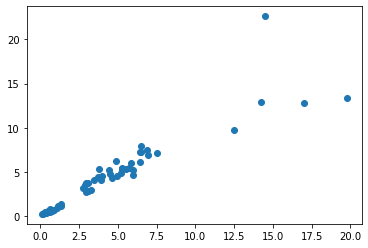

In [43]:
#Plotting the results

plt.scatter(y_test,predictions)

The plot comes out to be near to linear.


In [2]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)